# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows - 1 points

In [116]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
import sklearn.metrics

In [117]:
car_df= pd.read_csv('car-mpg-1.csv').rename(columns=lambda x: x.strip())
car_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis - 2 points

In [118]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [119]:
car_df.shape

(398, 9)

In [120]:
car_df = car_df.replace('?', np.nan)

In [121]:
car_df['hp']=pd.to_numeric(car_df['hp'])

In [122]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car name    398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary. - 1 points

In [123]:
car_df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car name    0
dtype: int64

In [124]:
car_df.applymap(np.isreal).all()

mpg          True
cyl          True
disp         True
hp           True
wt           True
acc          True
yr           True
origin       True
car name    False
dtype: bool

In [125]:
missing_values=car_df.columns[car_df.isnull().any()]

In [126]:
missing_values

Index(['hp'], dtype='object')

In [127]:
car_df['hp'] = car_df['hp'].fillna(car_df.hp.median()).astype(int)

In [128]:
car_df['hp'].isna().sum()

0

In [129]:
print("No null values now")

No null values now


In [130]:
#method 2
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='median',axis=1)  
#student_mat_df_input=student_mat_df.drop(['class'],axis=1)
#car_df_output=car_df['G3']
car_df1=car_df.drop('car name',axis=1)
imputer.fit_transform(car_df1)
car_df1

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
5,15.0,8,429.0,198,4341,10.0,70,1
6,14.0,8,454.0,220,4354,9.0,70,1
7,14.0,8,440.0,215,4312,8.5,70,1
8,14.0,8,455.0,225,4425,10.0,70,1
9,15.0,8,390.0,190,3850,8.5,70,1


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences - 1 points

In [131]:
import seaborn as sns

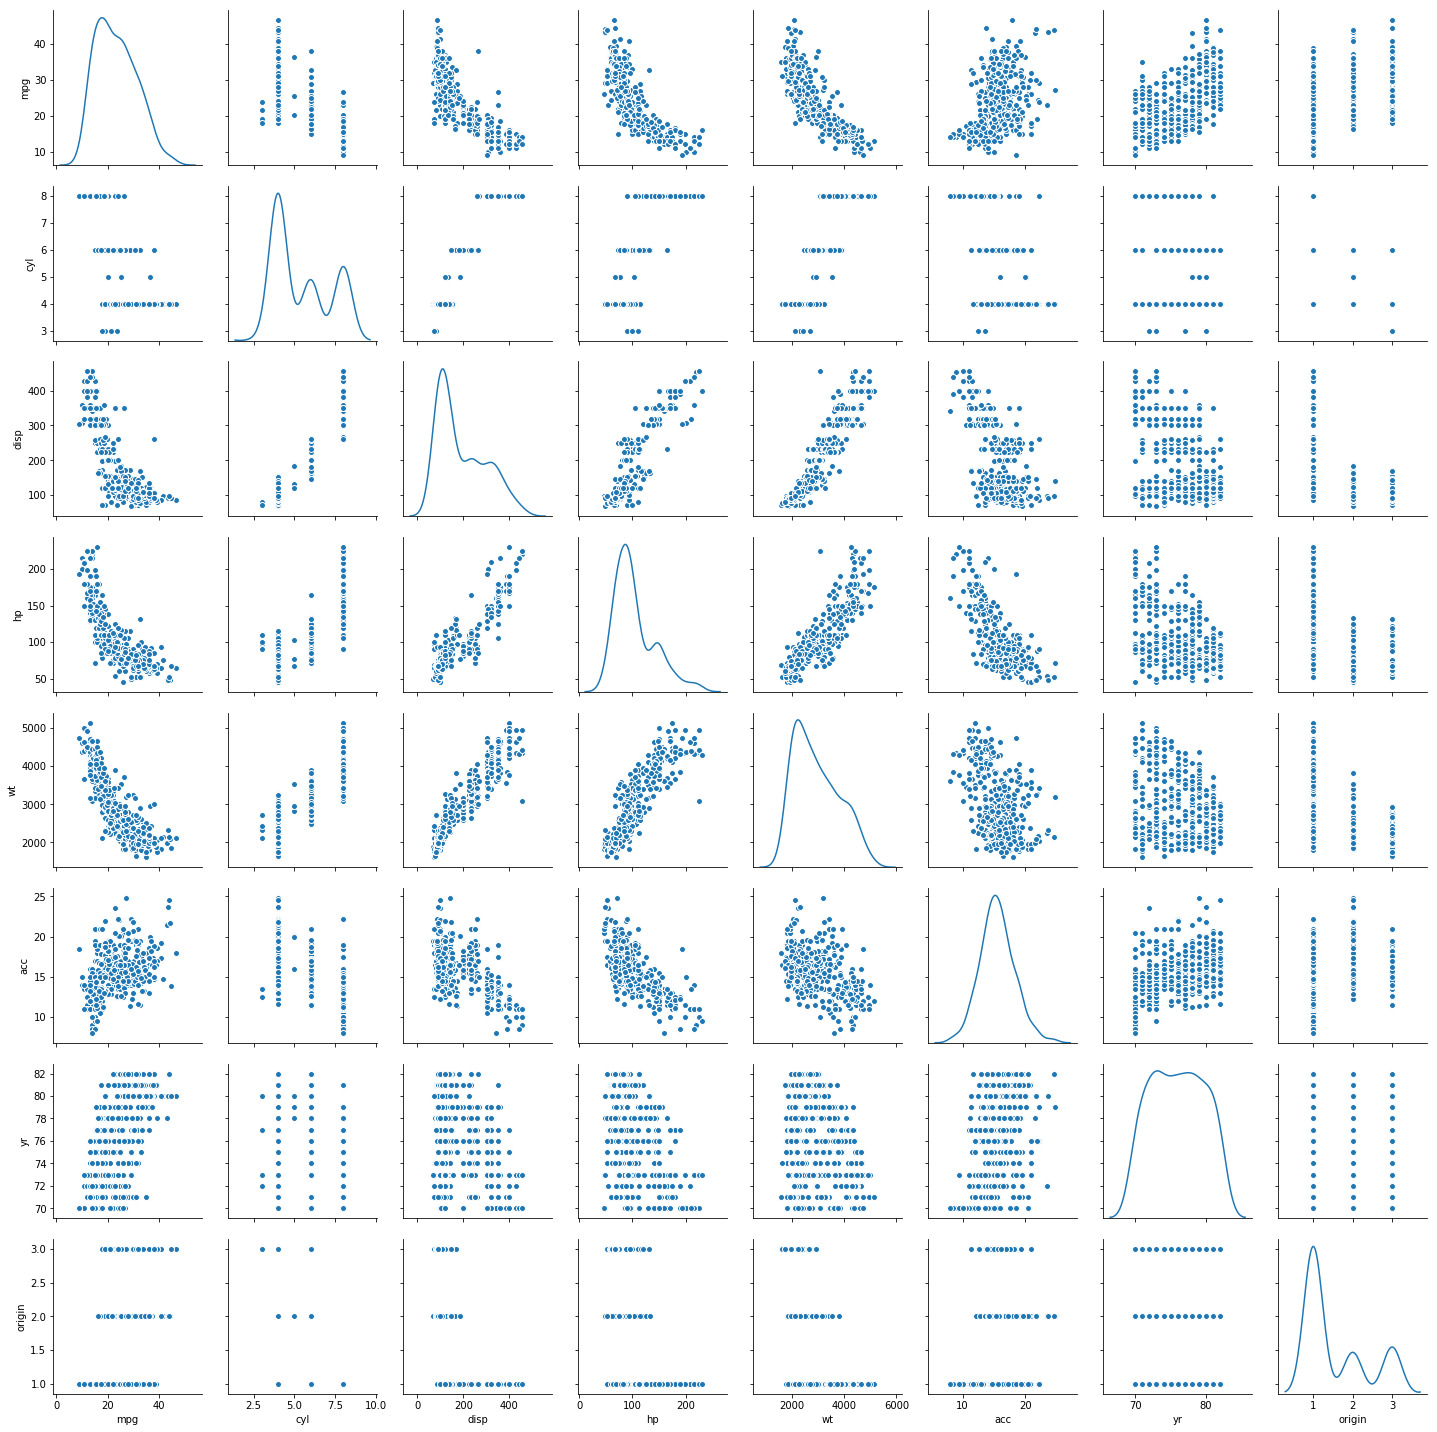

In [132]:
sns.pairplot(car_df1,diag_kind='kde')

In [133]:
print("hp and weight show linear correlation. directly proportional almost")
print("hp and acc show inverse relation. Seem correlated")
print("mpg decreases when hp increases")
print("hp is increasing when weight increases")
print("origin seems to be catagorical with 3 peaks")

hp and weight show linear correlation. directly proportional almost
hp and acc show inverse relation. Seem correlated
mpg decreases when hp increases
hp is increasing when weight increases
origin seems to be catagorical with 3 peaks


In [134]:
from plotnine import *

C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


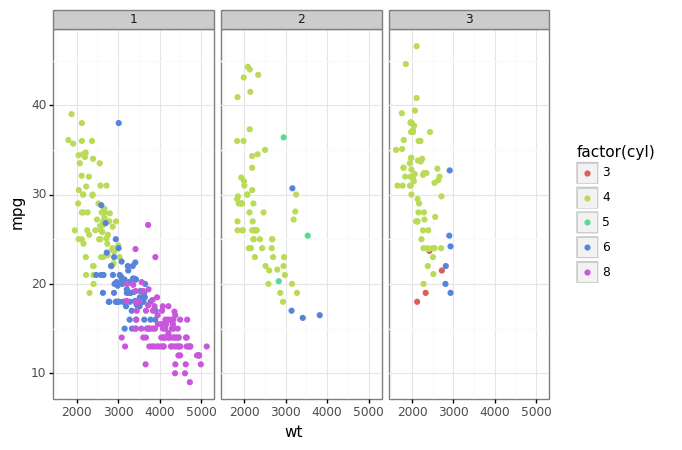

<ggplot: (28720574)>

In [135]:
(ggplot(car_df1,
       aes('wt','mpg',
          color='factor(cyl)'))
       +geom_point()
       +facet_wrap('~origin')
       +theme_bw())

In [136]:
print("lesser cylinder cars have less weight and high mpg whereas higher cylinder cars have more weight and lower mpg")

lesser cylinder cars have less weight and high mpg whereas higher cylinder cars have more weight and lower mpg


In [137]:
print("Origin 1 has more of high cylinder ,low mpg cars. Origin 2 and 3 focus more on high mpg cars")

Origin 1 has more of high cylinder ,low mpg cars. Origin 2 and 3 focus more on high mpg cars


In [138]:
#One hot encoding origin
car_df1=pd.get_dummies(car_df1,columns=['origin'])
car_df1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns - 1.5 points

In [139]:
car_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.296482,38.224809,46.0,76.000,93.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin_1,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_2,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0
origin_3,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0


In [140]:
print("One hot-encoding done above as part of feature engineering")

One hot-encoding done above as part of feature engineering


In [141]:
print("Checking correlation using heatmap")

Checking correlation using heatmap


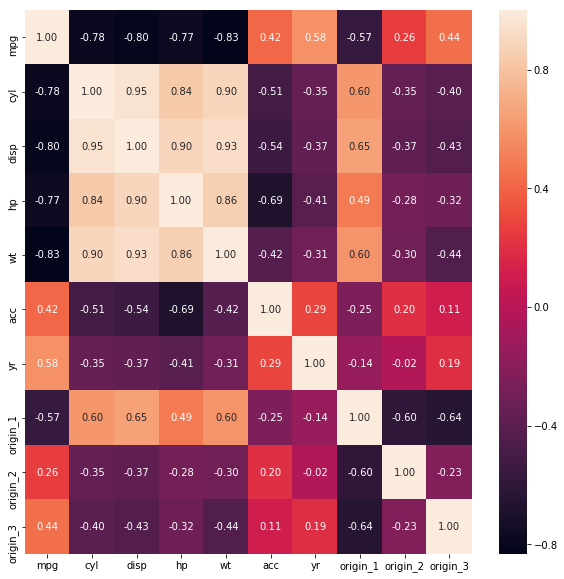

In [142]:
corr=car_df1.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,annot=True,fmt='0.2f')

In [143]:
print("If yu observe the top left part of the heatmap, there seems to be high negative correlation among cyl,disp,hp,wt with mpg.")
print("However, among themselves, cyl,disp,hp and wt have a positive correlation")

If yu observe the top left part of the heatmap, there seems to be high negative correlation among cyl,disp,hp,wt with mpg.
However, among themselves, cyl,disp,hp and wt have a positive correlation


In [144]:
print("Not deriving any new columns")

Not deriving any new columns


# Q6. Create new data frame with standardize variables and imputation for any missing/outliers - 2 points

In [146]:
from scipy import stats
car_interim=car_df1[['origin_1','origin_2','origin_3']]
#car_interim.head()
car_df1.drop(['origin_1','origin_2','origin_3'],axis=1,inplace=True)
car_df2=car_df1.apply(stats.zscore)


In [147]:
car_df2=car_df2.join(car_interim)
car_df2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3
0,-0.706439,1.498191,1.090604,0.673277,0.630870,-1.295498,-1.627426,1,0,0
1,-1.090751,1.498191,1.503514,1.590065,0.854333,-1.477038,-1.627426,1,0,0
2,-0.706439,1.498191,1.196232,1.197156,0.550470,-1.658577,-1.627426,1,0,0
3,-0.962647,1.498191,1.061796,1.197156,0.546923,-1.295498,-1.627426,1,0,0
4,-0.834543,1.498191,1.042591,0.935216,0.565841,-1.840117,-1.627426,1,0,0


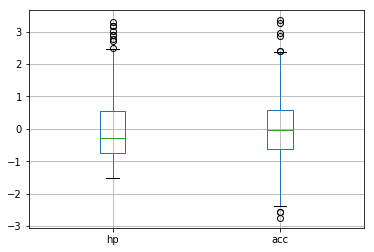

In [148]:
car_df2.boxplot(column=['hp','acc'])

In [167]:
#Removing outliers based on 2.5 z-score
car_df3=car_df2[(np.abs(car_df2) < 2).all(axis=1)]
car_df3.shape

(354, 10)

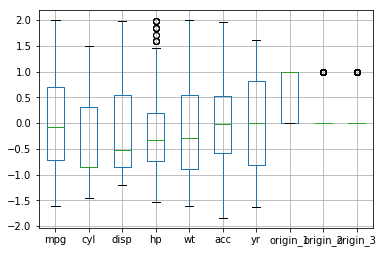

In [168]:
car_df3.boxplot()

# Q7. Create appropriate clusters with the new data set - 2

In [169]:
from sklearn import metrics

In [170]:
cluster_range = range( 2, 10)   
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(car_df3)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(car_df3, labels, metric='euclidean'))






# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,1112.431773,0.403691
1,3,868.787470,0.327142
2,4,671.109396,0.330590
3,5,602.965985,0.307874
4,6,556.117017,0.299838
5,7,513.091859,0.278210
6,8,485.058467,0.269064
7,9,450.429200,0.262754


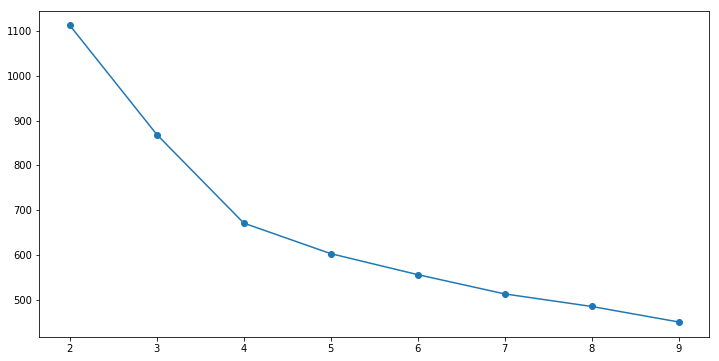

In [171]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [172]:
print("Considering 4 clusters as optimum")

Considering 4 clusters as optimum



# Q8. Identify the appropriate clusters with result from above question - 1.5 points

In [173]:
Kcluster = KMeans( n_clusters = 4, random_state = 1 )
Kcluster.fit(car_df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

# Q9. Check for no of values in each cluster and centers for each variables - 1 point

In [174]:
labels=Kcluster.predict(car_df3)

In [175]:
centroids=Kcluster.cluster_centers_

In [176]:
print("Centroid values:\n",centroids)

Centroid values:
 [[ 2.26129445e-01 -8.69548166e-01 -8.35790977e-01 -5.52246977e-01
  -7.92739242e-01  2.40447774e-01 -7.11628244e-01  2.24719101e-01
   4.71910112e-01  3.03370787e-01]
 [-1.07830624e+00  1.48137332e+00  1.30282054e+00  1.19940074e+00
   1.25366136e+00 -9.06485241e-01 -4.24371039e-01  1.00000000e+00
   3.05311332e-16  8.32667268e-17]
 [ 9.83148853e-01 -7.92685116e-01 -7.37085886e-01 -6.49635750e-01
  -7.18856179e-01  1.94106426e-01  1.07797562e+00  4.68468468e-01
   1.26126126e-01  4.05405405e-01]
 [-5.22823004e-01  3.98017576e-01  3.10394703e-01 -9.04017126e-02
   3.31990093e-01  3.40517874e-01 -6.71938631e-02  9.16666667e-01
   4.76190476e-02  3.57142857e-02]]


In [177]:
car_df3['GROUP'] = labels

C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [178]:
car_df3.groupby(['GROUP']).count()

,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3
GROUP,,,,,,,,,,
0,89,89,89,89,89,89,89,89,89,89
1,70,70,70,70,70,70,70,70,70,70
2,111,111,111,111,111,111,111,111,111,111
3,84,84,84,84,84,84,84,84,84,84


# Q10. Assign the groups created above to data frame and study the characteristics  for each group. - 2 points

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B9B9F98>,
      dtype=object)

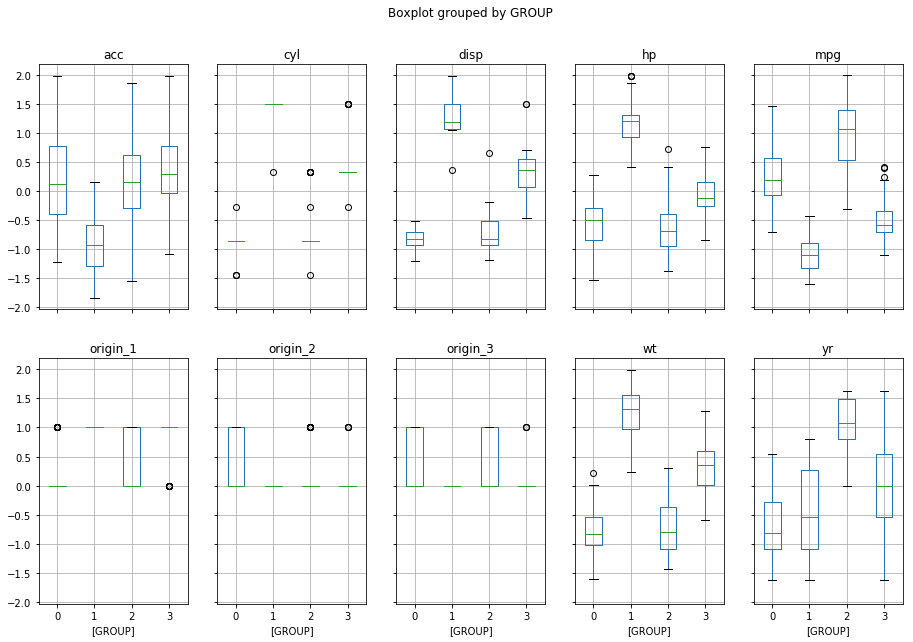

In [179]:
car_df3.boxplot(by = 'GROUP',  layout=(2,5), figsize=(15, 10))


In [184]:
print("Wrt to mpg, i see clear-cut clusters formed")
print("Rest other columns show overlap in the clusters")
print("origin_1 cars primarily belong to group 3, whereas origin_2 to group 0")
print("Could be that cars from origin_1 give good mileage if I correlate group 2 of origin_1 and mpg")
print("Likewise origin_3 cars give average to high mileage")
print("Group 0 are the low weight cars which provide average mileage - wt and mpg")
print("Group 1 are the high weight cars which provide poor mileage - wt and mpg")
print("Group 0 are the low weight cars which provide high mileage - wt and mpg")
print("Group 0 are the average weight cars which provide average mileage - wt and mpg")
print("Group 2 are the latest car models with high mileage - yr and mpg")
print("To me, Group 2 seems the area of action. It's interesting to see the patterns in this group")

Wrt to mpg, i see clear-cut clusters formed
Rest other columns show overlap in the clusters
origin_1 cars primarily belong to group 3, whereas origin_2 to group 0
Could be that cars from origin_1 give good mileage if I correlate group 2 of origin_1 and mpg
Likewise origin_3 cars give average to high mileage
Group 0 are the low weight cars which provide average mileage - wt and mpg
Group 1 are the high weight cars which provide poor mileage - wt and mpg
Group 0 are the low weight cars which provide high mileage - wt and mpg
Group 0 are the average weight cars which provide average mileage - wt and mpg
Group 2 are the latest car models with high mileage - yr and mpg
To me, Group 2 seems the area of action. It's interesting to see the patterns in this group
